<a href="https://colab.research.google.com/github/ManishKumarBaitharu/Practise/blob/main/MLW_PROJECT(ResNet50).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Folder found: /content/drive/MyDrive/ColabNotebooks/DataForMLW2/OvarianCancerImages
Total files: 200
['p26.png', 'p17.4.png', 'p35.png', 'p12.1.png', 'p34.3.png', '2.jpg', 'p22.png', 'p36.1.png', 'high grade serous 57.JPG', 'p31.png', 'high grade serous 62.JPG', 'p19.png', 'p4.png', 'high grade serous 55.JPG', 'high grade serous62.JPG', 'high serous 52.JPG', 'p8.png', 'high grade serous66.JPG', 'high grade serous 48.JPG', 'HGserous75.JPG', 'p2.png', 'p5.1.png', 'HGserous71.JPG', 'p29.1.png', 'high grade serous57.JPG', 'high grade serous53.JPG', 'high grade serous51.JPG', 'p17.png', 'HGserous74JPG.JPG', 'p29.3.png', 'p11.png', 'high grade serous 56.JPG', 'p22.1.png', 'p14.3.png', 'p21.png', 'high grade serous59.JPG', 'High grade serous60.JPG', 'p12.png', 'p17.1.png', 'HGserous76.JPG', 'p31.1.png', 'high grade serous 61.JPG', 'p7.png', 'p8.1.png', 'p20.2.png', 'p9.png', 'p19.2.png', 'low grade serous40.JPG', 'p20.png', 'p28.png', 'p15.png', 'low serous43.JPG', 'low grade serous 41.JPG', 

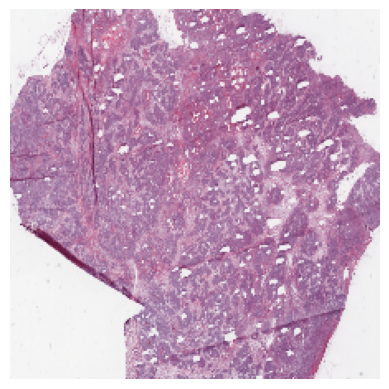

Loaded 101 images.


In [ ]:
import os
image_folder = '/content/drive/MyDrive/ColabNotebooks/DataForMLW2/OvarianCancerImages'
# Check if the folder exists and print the files in the folder
if os.path.exists(image_folder):
    print(f"Folder found: {image_folder}")
    files = os.listdir(image_folder)
    print(f"Total files: {len(files)}")
    print(files)  # Optional: To view the list of files in the folder
else:
    print("Folder not found. Please check the path.")

# Step 3: Load and display images (Optional)
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Example to load and display a single image from the folder
img_path = os.path.join(image_folder, files[0])  # Load the first image
img = image.load_img(img_path, target_size=(224, 224))  # Resize if needed
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

# Step 4: Load multiple images and convert to arrays (Optional)
import numpy as np

def load_images_from_drive(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            img_path = os.path.join(folder, filename)
            img = image.load_img(img_path, target_size=(224, 224))  # Adjust size as needed
            img_array = image.img_to_array(img)
            images.append(img_array)
    return np.array(images)

# Load all images from the 'image' folder
images = load_images_from_drive(image_folder)
print(f"Loaded {len(images)} images.")

Total number of augmented images: 1010


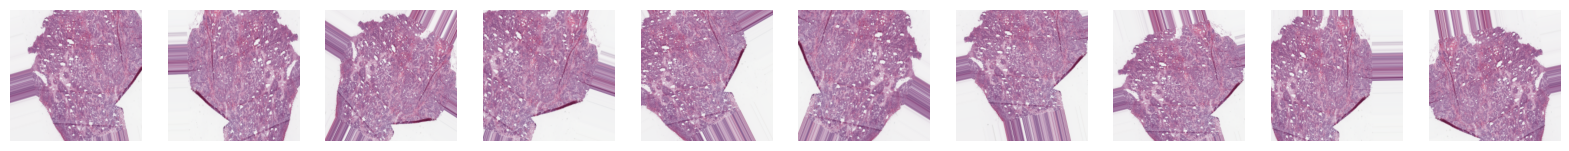

Total number of images (original + augmented): 1111
Total number of labels: 1111
Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 744ms/step - accuracy: 0.5410 - loss: 0.7990 - val_accuracy: 0.8789 - val_loss: 0.3744
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.8695 - loss: 0.3500 - val_accuracy: 0.8879 - val_loss: 0.3414
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9021 - loss: 0.2905 - val_accuracy: 0.8879 - val_loss: 0.3431
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9069 - loss: 0.3045 - val_accuracy: 0.8879 - val_loss: 0.3402
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8989 - loss: 0.3234 - val_accuracy: 0.8879 - val_loss: 0.3295
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9037 - loss: 0.2857 - val_accuracy: 0.8879 - val_loss: 0.3205
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.9157 - loss: 0.2466 - val_accuracy: 0.8879 - val_loss: 0.3137
Epoch 8/30
28/28 ━━━━

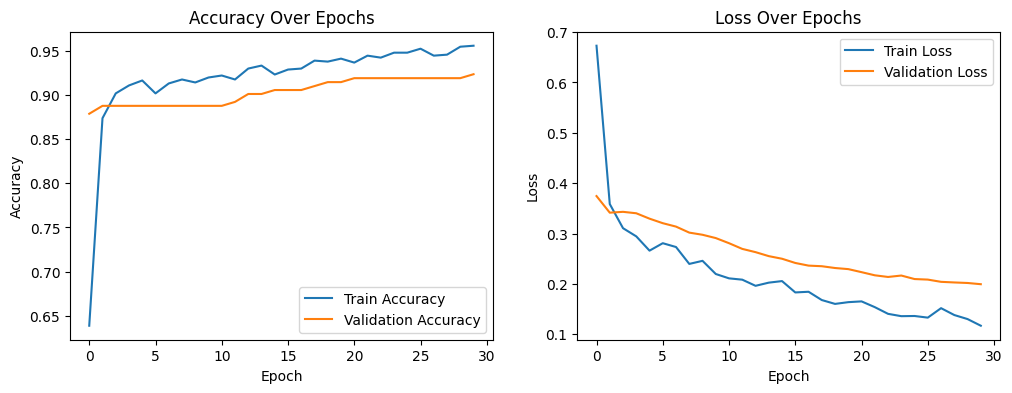

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to load and preprocess images
def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".JPG"):
            img_path = os.path.join(directory, filename)
            img = image.load_img(img_path, target_size=(224, 224))  # Resize images to 224x224 for ResNet50
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)  # Preprocess images as required for EfficientNet
            images.append(img_array)
    return np.array(images)

# Function to augment and visualize images
def augment_and_visualize(images, datagen, num_augmentations=10, visualize_count=10):
    augmented_images = []
    for img in images:
        x = img.reshape((1,) + img.shape)  # Reshape the image array
        i = 0
        for batch in datagen.flow(x, batch_size=1):
            augmented_images.append(batch[0])
            i += 1
            if i >= num_augmentations:
                break

    augmented_images = np.array(augmented_images)
    print(f"Total number of augmented images: {len(augmented_images)}")

    # Visualize some augmented images
    fig, axes = plt.subplots(1, visualize_count, figsize=(20, 20))
    for i in range(visualize_count):
        ax = axes[i]
        ax.imshow(augmented_images[i].astype('uint8'))
        ax.axis('off')
    plt.show()

    return augmented_images
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation and visualize
augmented_images = augment_and_visualize(images, datagen)

# Combine original and augmented images
all_images = np.concatenate((images, augmented_images), axis=0)
print(f"Total number of images (original + augmented): {len(all_images)}")

# Prepare labels (assuming binary classification)
labels = np.array([0] * len(images) + [1] * len(augmented_images))
print(f"Total number of labels: {len(labels)}")

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(all_images, labels, test_size=0.2, random_state=42)

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define the ResNet50 model
def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Change to 'softmax' and adjust units if multi-class
    ])

    # Freeze base model layers
    base_model.trainable = False
    return model

# Build and compile the model
model = create_resnet50_model()
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_accuracy}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()
